# Import the module

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import analysis as da
import importlib
import os

# (a) Collect all data from raw data sources.

In [6]:
importlib.reload(da)
pwd = os.getcwd()
custom_dir = ""#"Jz_0.0/"
sdir = pwd + "/../files/Beta_convergence/" + custom_dir  
variables = ["J_H", "lamda","fug", "Beta", "L"]
file_list, df = da.run_update(sdir, variables)

Hello, you are extracting *.txt files from  /home/santanu/Dropbox/spin_half_bilayer/Analysis_python/../files/Beta_convergence/


# (b) Print data

In [7]:
#df = df[df['Beta'] == 30]
print(df)

     J_H  lamda   fug   Beta  L  enrg_avg  enrg_err  enrg2_avg  enrg2_err  \
0  0.025    1.0  0.16  0.025  4 -2.045061  0.069198   4.246119    0.28879   

   enrg4_avg  ...  B_real2_1_1_avg  B_real2_1_1_err  B_real3_0_0_avg  \
0  19.113187  ...         -0.00491         0.001774         0.002407   

   B_real3_0_0_err  B_real3_0_1_avg  B_real3_0_1_err  B_real3_1_0_avg  \
0         0.002556         0.003445         0.002928        -0.001902   

   B_real3_1_0_err  B_real3_1_1_avg  B_real3_1_1_err  
0         0.002628        -0.004456         0.002494  

[1 rows x 91 columns]


# Rules for sym/asymm combination:

### Neel params:

Form = Layer1 + Layer2 $\pm$ (Interlayer1 + Interlayer2)  

$M^2_z(\textbf{q} = \pi + \frac{2\pi}{lx}, \pi)$ : $\text{N1}_{\text{real}} = \text{N}_{\text{real}}[0][0] + \text{N}_{\text{real}}[0][1] \pm (\text{N}_{\text{real}}[0][2] + \text{N}_{\text{real}}[0][3])$ 

$M^2_z(\textbf{q} = \pi, \pi + \frac{2\pi}{ly})$ : $\text{N2}_{\text{real}} = \text{N}_{\text{real}}[1][0] + \text{N}_{\text{real}}[1][1] \pm (\text{N}_{\text{real}}[1][2] + \text{N}_{\text{real}}[1][3])$ 

$M^2_z(\textbf{q} = \pi, \pi)$ : $\text{N3}_{\text{real}} = \text{N}_{\text{real}}[2][0] + \text{N}_{\text{real}}[2][1] \pm (\text{N}_{\text{real}}[2][2] + \text{N}_{\text{real}}[2][3])$

### VBS params:

Form = Layer1 + Layer2 $\pm$ (Interlayer1 + Interlayer2) 

$D_x(\textbf{q} = \pi, \frac{2\pi}{lx})$: $\text{B1}_{\text{real}} = \text{B}_{\text{real}}[0][0][0] + \text{B}_{\text{real}}[0][0][1] \pm (\text{B}_{\text{real}}[0][1][0] + \text{B}_{\text{real}}[0][1][1])$ 

$D_x(\textbf{q} = \pi, 0)$: $\text{B2}_{\text{real}} = \text{B}_{\text{real}}[1][0][0] + \text{B}_{\text{real}}[1][0][1] \pm (\text{B}_{\text{real}}[1][1][0] + \text{B}_{\text{real}}[1][1][1])$ 

$D_y(\textbf{q} = \frac{2\pi}{ly}, \pi)$: $\text{B3}_{\text{real}} = \text{B}_{\text{real}}[2][0][0] + \text{B}_{\text{real}}[2][0][1] \pm (\text{B}_{\text{real}}[2][1][0] + \text{B}_{\text{real}}[2][1][1])$

$D_y(\textbf{q} = 0, \pi)$: $\text{B4}_{\text{real}} = \text{B}_{\text{real}}[3][2][0] + \text{B}_{\text{real}}[3][2][1] \pm (\text{B}_{\text{real}}[3][2][2] + \text{B}_{\text{real}}[3][2][3])$

In [1]:
import numpy as np



N1_avg = np.array([df["N_real0_0_avg"], df["N_real0_1_avg"], df["N_real0_2_avg"], df["N_real0_3_avg"]])
N1_err = np.array([df["N_real0_0_err"], df["N_real0_1_err"], df["N_real0_2_err"], df["N_real0_3_err"]])

N2_avg = np.array([df["N_real1_0_avg"], df["N_real1_1_avg"], df["N_real1_2_avg"], df["N_real1_3_avg"]])
N2_err = np.array([df["N_real1_0_err"], df["N_real1_1_err"], df["N_real1_2_err"], df["N_real1_3_err"]])

N3_avg = np.array([df["N_real2_0_avg"], df["N_real2_1_avg"], df["N_real2_2_avg"], df["N_real2_3_avg"]])
N3_err = np.array([df["N_real2_0_err"], df["N_real2_1_err"], df["N_real2_2_err"], df["N_real2_3_err"]])

N4_avg = np.array([df["N_real3_0_avg"], df["N_real3_1_avg"], df["N_real3_2_avg"], df["N_real3_3_avg"]])
N4_err = np.array([df["N_real3_0_err"], df["N_real3_1_err"], df["N_real3_2_err"], df["N_real3_3_err"]])


asym_kernel = np.array([1.,1.,-1.,-1.])
sym_kernel = np.array([1.,1.,1.,1.])

# Add/subtract datasets element-wise
N1sym_avg, N1sym_err = np.sum(y_data[0], np.sum(y_data[1:], axis=0)), np.sqrt(np.sum(np.square(error_data), axis=0))


# Display the combined result
print("Combined Data:", N1sym_avg)
print("Combined Error:", N1sym_err)



N1_avg = np.array([df["B_real0_0_0_avg"], df["B_real0_0_1_avg"], df["B_real0_2_avg"], df["N_real0_3_avg"]])
N1_err = np.array([df["B_real0_0_err"], df["B_real0_1_err"], df["N_real0_2_err"], df["N_real0_3_err"]])

N2_avg = np.array([df["N_real1_0_avg"], df["N_real1_1_avg"], df["N_real1_2_avg"], df["N_real1_3_avg"]])
N2_err = np.array([df["N_real1_0_err"], df["N_real1_1_err"], df["N_real1_2_err"], df["N_real1_3_err"]])

N3_avg = np.array([df["N_real2_0_avg"], df["N_real2_1_avg"], df["N_real2_2_avg"], df["N_real2_3_avg"]])
N3_err = np.array([df["N_real2_0_err"], df["N_real2_1_err"], df["N_real2_2_err"], df["N_real2_3_err"]])

N4_avg = np.array([df["N_real3_0_avg"], df["N_real3_1_avg"], df["N_real3_2_avg"], df["N_real3_3_avg"]])
N4_err = np.array([df["N_real3_0_err"], df["N_real3_1_err"], df["N_real3_2_err"], df["N_real3_3_err"]])


NameError: name 'df' is not defined

# (c) Save data containing all parameters. MASTER DATA

In [10]:
importlib.reload(da)
save_dir = pwd + "/../MasterData/" 
print(save_dir)
output_file = "mData_L_Beta_Jz0.0.dat"
print(output_file)
da.savefile(df, save_dir, output_file)

/home/santanu/Dropbox/Square_Kitaev2D_analysis/SSEanalysis_src/../MasterData/
mData_L_Beta_Jz0.0.dat


# (d) ($<S^z_0S^z_j>$ for $j=0,..., N$)

In [41]:
importlib.reload(da)
pwd = os.getcwd()
custom_dir = "Jz_0.5/"
sdir = pwd + "/../files/" + custom_dir  
variables = ['Beta','L']
file_list, df = da.run_update(sdir, variables, "szsz_avg.txt")



# Use melt to reshape the DataFrame
df_melted = pd.melt(df, var_name='Var', value_name='Value')

# Extract columns with "_avg" and "_err"
avg_rows = df_melted[df_melted['Var'].str.endswith('_avg')].reset_index(drop=True)
err_rows = df_melted[df_melted['Var'].str.endswith('_err')].reset_index(drop=True)

# Create a new DataFrame with the desired structure
df = pd.DataFrame({
    'SzSz_Avg': avg_rows['Value'],
    'SzSz_Err': err_rows['Value']
})

# Display the resulting DataFrame
print(df)


Hello, you are extracting *.txt files from  /home/santanu/Dropbox/Square_Kitaev2D_analysis/SSEanalysis_src/../files/Jz_0.5/
    SzSz_Avg  SzSz_Err
0   1.000000  0.000000
1   0.014630  0.000841
2   0.013452  0.001949
3   0.015008  0.001619
4   0.215553  0.001867
5   0.011388  0.001279
6   0.013462  0.001891
7   0.014942  0.000752
8   0.107725  0.000863
9   0.012827  0.001120
10  0.013020  0.002355
11  0.013193  0.002347
12  0.212703  0.000829
13  0.011200  0.001244
14  0.012623  0.001184
15  0.012155  0.001996


# (e) save $<S_zS_j>$ data

In [10]:
importlib.reload(da)
save_dir = pwd + "/../MasterData/" 
print(save_dir)
output_file = "mData_L_Beta_Jz0.0.dat"
print(output_file)
da.savefile(df, save_dir, output_file)

/home/santanu/Dropbox/Square_Kitaev2D_analysis/SSEanalysis_src/../MasterData/
mData_L_Beta_Jz0.0.dat


# (f) Plot data of $<E>$ v $L$

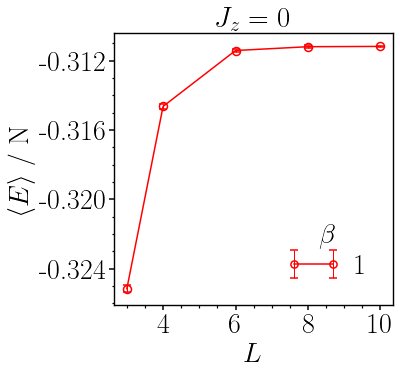

In [15]:
import matplotlib.pyplot as plt
import plot_helper as ph



importlib.reload(ph)
# Assuming it's a CSV file, you can use the read_csv function
ifile = os.getcwd() + "/../MasterData/"  + "mData_L_Beta_Jz0.0.dat"

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 24
plt.rcParams['font.serif'] = "computer modern roman"
plt.rcParams['axes.linewidth'] = 1.5

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fs = 28
beta = [1]
xye = ["L","Energy_avg","Energy_err"]
ph.plot_data(ifile, ax, 'Beta', beta, xye)
ax.legend(labels=beta, frameon=False, loc='best', labelspacing=.2, handlelength=2, fontsize=fs, numpoints = 2, 
        title=r"$\beta$", title_fontsize=fs, markerscale=0.9, handletextpad=0.5)
ax.set_xlabel(r"$L$", fontsize = fs)
ax.set_ylabel(r"$\langle E \rangle$ / N", fontsize = fs)
plt.title(r"$J_z= 0$")
plt.show()

# (g) Plot data of $<M^2>$ v $J_z$

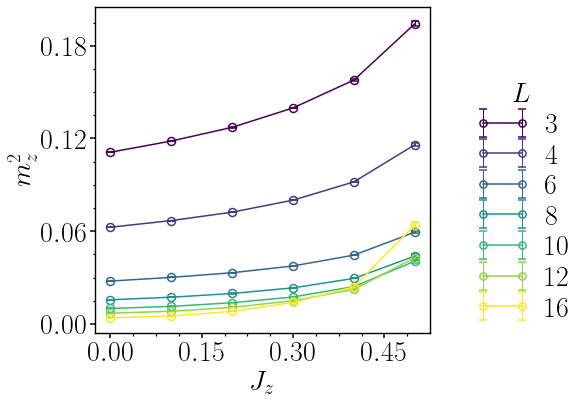

In [44]:
import matplotlib.pyplot as plt
import plot_helper as ph



importlib.reload(ph)
# Assuming it's a CSV file, you can use the read_csv function
ifile = os.getcwd() + "/../MasterData/"  + "mData_L_Beta_Jz0.0.dat"

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 24
plt.rcParams['font.serif'] = "computer modern roman"
plt.rcParams['axes.linewidth'] = 1.5

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
fs = 28
L = [3,4,6,8,10,12,16]
xye = ["Jz","Mag^2_avg","Mag^2_err"]
ph.plot_data(df, ax, 'L', L, xye)
ax.legend(labels=L, frameon=False, loc=(1.1,0.0), labelspacing=.2, handlelength=2, fontsize=fs, numpoints = 2, 
        title=r"$L$", title_fontsize=fs, markerscale=0.9, handletextpad=0.5)
ax.set_xlabel(r"$J_z$", fontsize = fs)
ax.set_ylabel(r"$m^2_z$", fontsize = fs)
#plt.title(r"$<M^2_z>$")
plt.show()

In [4]:
import numpy as np

def get_subarray_at_nth_row(arr, n):
    # Use array slicing to get a subarray at every Nth row
    subarray = arr[::n]
    return subarray

# Example array
my_array = np.array([1, 2, 3,
                     4, 5, 6,
                     7, 8, 9,
                     10, 11, 12])

# Get a subarray at every 2nd row
result = get_subarray_at_nth_row(my_array, 2)

print("Original Array:")
print(my_array)
print("\nSubarray at every 2nd row:")
print(result)


Original Array:
[ 1  2  3  4  5  6  7  8  9 10 11 12]

Subarray at every 2nd row:
[ 1  3  5  7  9 11]


In [17]:
import pandas as pd

# Sample DataFrame
data = {
    'A': [1, 4, 7],
    'B': [2, 5, 8],
    'C': [3, 6, 9],
    'D': [10, 11, 12],
    'A': [13, 14, 15],
    'C': [16, 17, 18],
    'C': [19, 20, 21],
    'D': [22, 23, 24]
}

df = pd.DataFrame(data)

print(df)

# Group by columns and aggregate them into a single column
grouped_df = df.groupby(level=0, axis=1).agg(lambda x: ', '.join(map(str, x)))

# Reset index to create a new column for original indices
grouped_df.reset_index(inplace=True, drop=True)

print("Original DataFrame:")
print(df)

print("\nGrouped DataFrame:")
print(grouped_df)


    A  B   C   D
0  13  2  19  22
1  14  5  20  23
2  15  8  21  24
Original DataFrame:
    A  B   C   D
0  13  2  19  22
1  14  5  20  23
2  15  8  21  24

Grouped DataFrame:
   A  B  C  D
0  A  B  C  D
1  A  B  C  D
2  A  B  C  D


In [40]:
import pandas as pd

# Sample DataFrame
data = {'A_avg': [1.2, 2.3, 3.4],
        'A_err': [0.1, 0.2, 0.3],
        'B_avg': [4.5, 5.6, 6.7],
        'B_err': [0.4, 0.5, 0.6],
        'C_avg': [7.8, 8.9, 9.0],
        'C_err': [0.7, 0.8, 0.9],
        'D_avg': [10.1, 11.2, 12.3],
        'D_err': [1.0, 1.1, 1.2],
        'E_avg': [13.4, 14.5, 15.6],
        'E_err': [1.3, 1.4, 1.5]}

df = pd.DataFrame(data)

# Use melt to reshape the DataFrame
df_melted = pd.melt(df, var_name='Var', value_name='Value')

# Extract columns with "_avg" and "_err"
avg_rows = df_melted[df_melted['Var'].str.endswith('_avg')].reset_index(drop=True)
err_rows = df_melted[df_melted['Var'].str.endswith('_err')].reset_index(drop=True)

# Create a new DataFrame with the desired structure
result_df = pd.DataFrame({
    'All_Column_Avg': avg_rows['Value'],
    'All_Column_Err': err_rows['Value']
})

# Display the resulting DataFrame
print(result_df)


    All_Column_Avg  All_Column_Err
0              1.2             0.1
1              2.3             0.2
2              3.4             0.3
3              4.5             0.4
4              5.6             0.5
5              6.7             0.6
6              7.8             0.7
7              8.9             0.8
8              9.0             0.9
9             10.1             1.0
10            11.2             1.1
11            12.3             1.2
12            13.4             1.3
13            14.5             1.4
14            15.6             1.5
